### Import Libraries

In [52]:
# ! ./00.install.sh

In [53]:
! pip list | grep torch

torch                        2.5.1


In [16]:
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.utils import np_utils
from keras.utils import to_categorical
import tensorflow as tf
# from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization

from keras.callbacks import TensorBoard,ModelCheckpoint
from keras import backend as K
from keras.metrics import top_k_categorical_accuracy
import os
print("hello")

hello


: 

In [6]:
# def set_keras_backend(backend):

#     if K.backend() != backend:
#         os.environ['KERAS_BACKEND'] = backend
#         reload(K)
#         assert K.backend() == backend

# set_keras_backend("theano")
K.set_image_data_format('channels_first')
print(K.backend(), K.image_data_format())

tensorflow channels_first


### Define Parameters

In [ ]:
batch_size = 128 #128
samples_per_epoch = 10
num_classes = 5
epochs = 40
# class_names = ["voip", "video", "file transfer", "chat", "browsing"]
class_names=["file_transfer", "other"]
# input hist dimensions
height, width = 1500, 1500
input_shape = (1, height, width)
# MODEL_NAME = "overlap_multiclass_reg_non_bn"
MODEL_NAME="file_transfer_detection"

PATH_PREFIX = "/root/dev/FlowPic/datasets/file_transfer_vs_all_"

# PATH_PREFIX = "D:/TS/Internet Traffic Classification/datasets/overlap_multiclass_reg/overlap_multiclass_"

### Import Train and Validation Data

In [8]:
x_train = np.load(PATH_PREFIX + "reg_x_train.npy")
y_train_true = np.load(PATH_PREFIX + "reg_y_train.npy")
x_val = np.load(PATH_PREFIX + "reg_x_val.npy")
y_val_true = np.load(PATH_PREFIX + "reg_y_val.npy")

print(x_train.shape, y_train_true.shape)
print(x_val.shape, y_val_true.shape)

(652, 1, 1500, 1500) (652,)
(73, 1, 1500, 1500) (73,)


### Shuffle Data

In [9]:
def shuffle_data(x, y):
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    x = x[s]
    y = y[s]
    print (x.shape, y.shape)
    return x, y

x_train, y_train_true = shuffle_data(x_train, y_train_true)

print(y_train_true[0:10])

(652, 1, 1500, 1500) (652,)
[1. 1. 0. 1. 0. 0. 0. 1. 1. 1.]


### convert class vectors to binary class matrices

In [10]:
y_train = to_categorical(y_train_true, num_classes)
y_val = to_categorical(y_val_true, num_classes)
print(y_train[0:10])
print (y_val[0:10])
print(y_train.shape, y_val.shape)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
(652, 5) (73, 5)


### Define and Compile model

In [13]:
# def precision(y_true, y_pred):
#     """Precision metric.

#     Only computes a batch-wise average of precision.

#     Computes the precision, a metric for multi-label classification of
#     how many selected items are relevant.
#     """
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def recall(y_true, y_pred):
#     """Recall metric.

#     Only computes a batch-wise average of recall.

#     Computes the recall, a metric for multi-label classification of
#     how many relevant items are selected.
#     """
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def f1_score(y_true, y_pred):
#     prec = precision(y_true, y_pred)
#     rec = recall(y_true, y_pred)
#     return 2*((prec*rec)/(prec+rec))

# def top_2_categorical_accuracy(y_true, y_pred):
#     return top_k_categorical_accuracy(y_true, y_pred, k=2) 

# # from keras.layers.core import Activation
# from keras.layers import Activation


# model = Sequential()
# # model.add(BatchNormalization(input_shape=input_shape, axis=-1, momentum=0.99, epsilon=0.001)) ############################
# model.add(Conv2D(10, kernel_size=(10, 10),strides=5,padding="same", input_shape=input_shape))
# convout1 = Activation('relu')
# model.add(convout1)
# print(model.output_shape)
# model.add(MaxPooling2D(pool_size=(2, 2)))
# print(model.output_shape)
# model.add(Conv2D(20, (10, 10),strides=5,padding="same"))  #################################################
# convout2 = Activation('relu')
# model.add(convout2)
# print(model.output_shape)
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# print(model.output_shape)
# model.add(Flatten())
# print(model.output_shape)
# model.add(Dense(64, activation='relu'))
# print(model.output_shape)
# model.add(Dropout(0.5))
# print(model.output_shape)
# model.add(Dense(num_classes, activation='softmax'))
# print(model.output_shape)

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', top_2_categorical_accuracy, f1_score, precision, recall])

/root/miniconda3/envs/eta/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1737380736.445441  829767 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(None, 10, 300, 300)
(None, 10, 150, 150)
(None, 20, 30, 30)
(None, 20, 15, 15)
(None, 4500)
(None, 64)
(None, 64)
(None, 5)


### Define nice_imshow and make_moasic functions

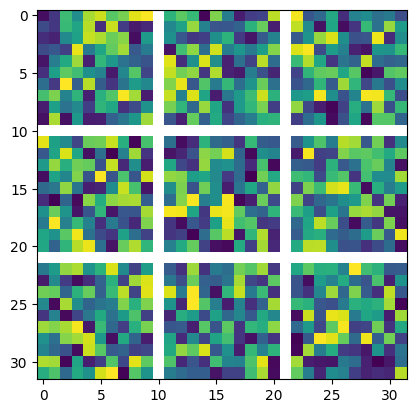

In [24]:
import pylab as pl
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None, bar=True):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap,origin='lower')
    if bar:
        cax = divider.append_axes("right", size="5%", pad=0.05)
        pl.colorbar(im, cax=cax)

def plotNNFilter2(data, nrows, ncols, layer_name, cmap=None, bar=True):
    """Wrapper around pl.subplot with color bar"""
    if cmap is None:
        cmap = "gray"
    
    fig, axes = pl.subplots(nrows, ncols,figsize=(5*ncols, 4*nrows))
    for i, ax in enumerate(axes.flat):
        im = ax.imshow(data[:,:,i], interpolation="nearest", cmap=cmap)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.invert_yaxis()

    fig.subplots_adjust(wspace=0.025, hspace=0.05)
    if bar:
        fig.colorbar(im, ax=axes.ravel().tolist())
    
    pl.savefig(MODEL_NAME +  "_plotNNFilter2_" + layer_name, bbox_inches='tight', pad_inches=1)
    pl.show()

def plotNNFilter(data, nrows, ncols, layer_name, cmap=None, bar=True):
    """Wrapper around pl.subplot"""
    if cmap is None:
        cmap = "gray"
    
    pl.figure(figsize=(3*ncols, 3*nrows))
    
    for i in range(nrows*ncols):
        pl.subplot(nrows, ncols, i+1)
        pl.imshow(data[:,:,i], interpolation="nearest", cmap=cmap)
        pl.xticks([])
        pl.yticks([])
        pl.gca().invert_yaxis()
    pl.subplots_adjust(wspace=0.025, hspace=0.05)
    pl.savefig(MODEL_NAME +  "_plotNNFilter_" + layer_name, bbox_inches='tight', pad_inches=1)
    pl.show()
        
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[2]
    imshape = imgs.shape[0:2]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[:,:,i]
    return mosaic

def mosaic_imshow(imgs, nrows, ncols, cmap=None, border=1, layer_name="convout"):
    pl.figure(figsize=(3*ncols, 3*nrows))
#     pl.suptitle('convout2')
    nice_imshow(pl.gca(), make_mosaic(imgs, nrows, ncols, border=border), cmap=cmap)
    pl.savefig(MODEL_NAME +  "_mosaic_imshow_" + layer_name, bbox_inches='tight', pad_inches=1)
    pl.show()

pl.imshow(make_mosaic(np.random.random((10, 10, 9)), 3, 3, border=1))
pl.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1.0


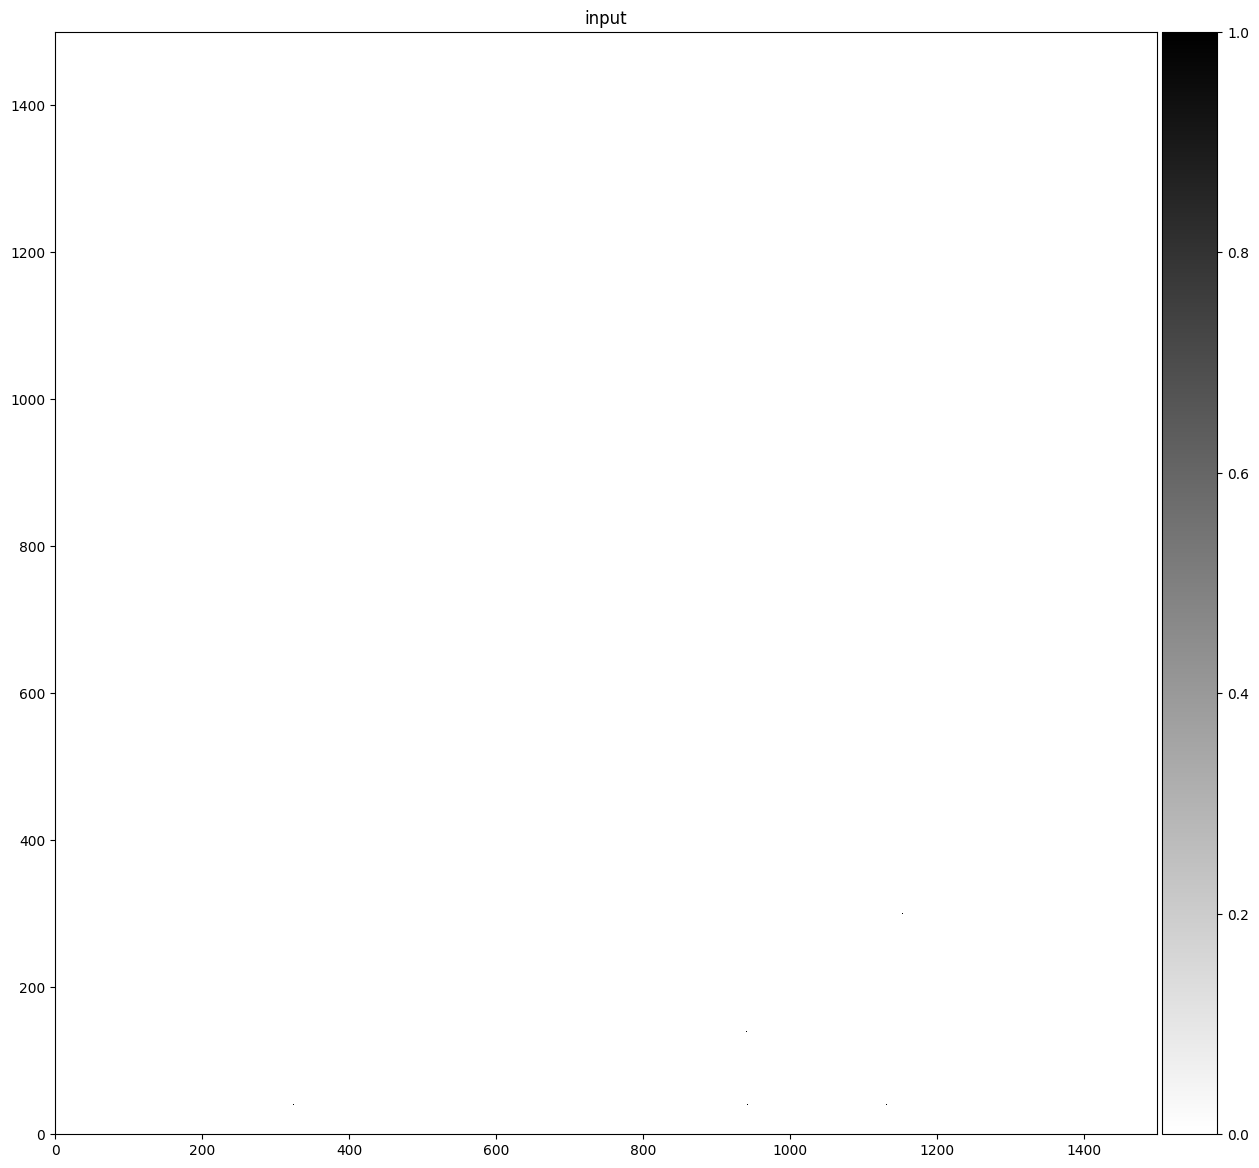

In [23]:
import tensorflow as tf

# Visualize the first layer of convolutions on an input image

i = 35
X = x_train[i][0]
print(X)
print(y_train_true[i])
pl.figure(figsize=(15, 15))
pl.title('input')
nice_imshow(pl.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.binary)
pl.savefig(MODEL_NAME +  "_input", bbox_inches='tight', pad_inches=1)
pl.show()

# # Visualize convolution result (after activation)
# def get_layer_output(layer, input_img, layer_name):
#     # Create a Keras function using tf.keras.backend
#     convout_f = tf.keras.backend.function(model.inputs, [layer.output])
    
#     # Get the output of the layer
#     C = convout_f([input_img])
    
#     # Process the output
#     C = np.squeeze(C)
#     print(layer_name + " output shape : ", C.shape)
#     C = np.transpose(C)
#     C = np.swapaxes(C, 0, 1)
#     print(layer_name + " output shape : ", C.shape)
    
#     return C
#     # convout_f = tf.keras.backend.function(model.inputs, [layer.output])
    # C = convout_f([input_img])
    # C = np.squeeze(C)
    # print(layer_name + " output shape : ", C.shape)
    # C = np.transpose(C)
    # C = np.swapaxes(C, 0, 1)
    # print(layer_name + " output shape : ", C.shape)
    # return C
    # convout_f = K.function(model.inputs, [layer.output])
    # C = convout_f([input_img])
    # C = np.squeeze(C)
    # print(layer_name + " output shape : ", C.shape)
    # C = np.transpose(C)
    # C = np.swapaxes(C,0,1)
    # print(layer_name + " output shape : ", C.shape)
    # return C
    

# C1 = get_layer_output(convout1, x_train[i:i+1], layer_name="convout1_before")
# mosaic_imshow(C1, 2, 5, cmap=cm.binary, border=2, layer_name="convout1_before")
# plotNNFilter(C1, 2, 5, cmap=cm.binary, layer_name="convout1_before")
# plotNNFilter2(C1, 2, 5, cmap=cm.binary, layer_name="convout1_before")

# C2 = get_layer_output(convout2, x_train[i:i+1], layer_name="convout2_before")
# mosaic_imshow(C2, 4, 5, cmap=cm.binary, border=2, layer_name="convout2_before")
# plotNNFilter(C2, 4, 5, cmap=cm.binary, layer_name="convout2_before")
# plotNNFilter2(C2, 4, 5, cmap=cm.binary, layer_name="convout2_before")

In [ ]:
# Visualize weights
W1 = model.layers[0].get_weights()[0]
W1 = np.squeeze(W1)
# W1 = np.asarray(W1)
print("W1 shape : ", W1.shape)

mosaic_imshow(W1, 2, 5, cmap=cm.binary, border=1, layer_name="conv1_weights_before")
plotNNFilter(W1, 2, 5, cmap=cm.binary, layer_name="conv1_weights_before")
plotNNFilter2(W1, 2, 5, cmap=cm.binary, layer_name="conv1_weights_before")

# Visualize weights
W2 = model.layers[3].get_weights()[0][:,:,0,:]
W2 = np.asarray(W2)
print("W2 shape : ", W2.shape)

mosaic_imshow(W2, 4, 5, cmap=cm.binary, border=1, layer_name="conv2_weights_before")
plotNNFilter(W2, 4, 5, cmap=cm.binary, layer_name="conv2_weights_before")
plotNNFilter2(W2, 4, 5, cmap=cm.binary, layer_name="conv2_weights_before")


: 

### Fit model on training data

In [39]:
import tensorflow as tf
from tensorflow.keras import backend as K

# def f1_score(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
#     precision = true_positives / (predicted_positives + K.epsilon())
#     recall = true_positives / (possible_positives + K.epsilon())
    
#     f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
#     return f1_val

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
    precision_val = true_positives / (predicted_positives + K.epsilon())
    return precision_val

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall_val = true_positives / (possible_positives + K.epsilon())
    return recall_val
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2*((prec*rec)/(prec+rec))

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import Activation
model = Sequential()
# model.add(BatchNormalization(input_shape=input_shape, axis=-1, momentum=0.99, epsilon=0.001)) ############################
model.add(Conv2D(10, kernel_size=(10, 10),strides=5,padding="same", input_shape=input_shape))
convout1 = Activation('relu')
model.add(convout1)
print(model.output_shape)
model.add(MaxPooling2D(pool_size=(2, 2)))
print(model.output_shape)
model.add(Conv2D(20, (10, 10),strides=5,padding="same"))  #################################################
convout2 = Activation('relu')
model.add(convout2)
print(model.output_shape)
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dense(64, activation='relu'))
print(model.output_shape)
model.add(Dropout(0.5))
print(model.output_shape)
model.add(Dense(num_classes, activation='softmax'))
print(model.output_shape)
X = torch.rand(size=(1, 1, 1500, 1500), dtype=torch.float32)
for layer in model:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)
    print("hello")
assert False
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', top_2_categorical_accuracy, f1_score, precision, recall])
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=[
        'accuracy', 
        # tf.keras.metrics.top_k_categorical_accuracy(k=2, name='top_2_accuracy'),
        # f1_score, 
        # precision, 
        # recall
    ]
)
# 设置回调函数
MODEL_NAME = "file_transfer_detection"
log_dir = "./Graph"
suffix=".weights.h5"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)
checkpointer_loss = ModelCheckpoint(filepath=MODEL_NAME + '_loss' + suffix, verbose=1, save_best_only=True, save_weights_only=True)
checkpointer_acc = ModelCheckpoint(monitor='val_accuracy', filepath=MODEL_NAME + '_acc' + suffix, verbose=1, save_best_only=True, save_weights_only=True)

# 数据生成器
def generator(features, labels, batch_size):
    num_samples = len(features)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            yield features[batch_indices], labels[batch_indices]

 

# 创建数据生成器
batch_size = 128
train_generator = generator(x_train, y_train, batch_size)
val_generator = generator(x_val, y_val, batch_size)

# 计算每个 epoch 的步数
steps_per_epoch = len(x_train) // batch_size
validation_steps = len(x_val) // batch_size

# 训练模型
epochs = 10
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[tensorboard_callback, checkpointer_loss, checkpointer_acc],
                    validation_data=val_generator,
                    validation_steps=validation_steps)

(None, 10, 300, 300)
(None, 10, 150, 150)
(None, 20, 30, 30)
(None, 20, 15, 15)
(None, 4500)
(None, 64)
(None, 64)
(None, 2)


TypeError: 'Sequential' object is not iterable

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# 假设输入数据的形状和类别数
# input_shape = (1, 1500, 1500)  # 示例输入形状 (通道, 高度, 宽度)
num_classes = len(class_names)  # 示例类别数

# 定义模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.model = nn.Sequential(
            # 第一层卷积
            nn.Conv2d(in_channels=input_shape[0], out_channels=10, kernel_size=10, stride=5, padding=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # 第二层卷积
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=10, stride=5, padding=5),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # 展平
            nn.Flatten(),
            # 全连接层
            nn.Linear(20 * 7 * 7, 64),  # 假设输入形状为 (1, 28, 28)，经过卷积和池化后的形状为 (20, 7, 7)
            nn.ReLU(),
            nn.Dropout(0.5),
            # 输出层
            nn.Linear(64, num_classes),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        return self.model(x)

# 初始化模型、损失函数和优化器
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 将数据转换为 PyTorch 张量
train_dataset = TensorDataset(torch.tensor(x_train).to(device), torch.tensor(y_train).to(device))
val_dataset = TensorDataset(torch.tensor(x_val).to(device), torch.tensor(y_val).to(device))

# 创建数据加载器
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 训练模型
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (i + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    # 验证模型
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Epoch [{epoch + 1}/{epochs}], Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {100 * correct / total:.2f}%')

Using device: cuda


RuntimeError: Input type (short unsigned int) and bias type (float) should be the same

In [28]:
# tensorboard = TensorBoard(log_dir='./Graph', histogram_freq=1,  write_graph=True,write_images=True)
# # tensorboard = TensorBoard(log_dir='./Graph', histogram_freq=1, write_grads=True, write_graph=True,write_images=True, batch_size=batch_size)
# checkpointer_loss = ModelCheckpoint(filepath= MODEL_NAME + '_loss.hdf5', verbose=1, save_best_only=True, save_weights_only=True)
# checkpointer_acc = ModelCheckpoint(monitor='val_acc', filepath= MODEL_NAME + '_acc.hdf5', verbose=1, save_best_only=True, save_weights_only=True)
# tensorboard.set_model(model)

# def generator(features, labels, batch_size):
#     index = 0
#     while True:
#         index += batch_size
#         if index >= len(features):
#             batch_features = np.append(features[index-batch_size:len(features)], features[0:index-len(features)], axis=0)
#             batch_labels = np.append(labels[index-batch_size:len(features)], labels[0:index-len(features)], axis=0)
#             index -= len(features)
#             yield batch_features, batch_labels
#         else:
#             yield features[index-batch_size:index], labels[index-batch_size:index]

# history = model.fit_generator(generator(x_train, y_train, batch_size),
#           epochs=epochs,
#           samples_per_epoch=samples_per_epoch,
#           verbose=1,
#           callbacks=[tensorboard,checkpointer_loss,checkpointer_acc],
#           validation_data=(x_val, y_val))

ValueError: When using `save_weights_only=True` in `ModelCheckpoint`, the filepath provided must end in `.weights.h5` (Keras weights format). Received: filepath=file_transfer_detection_loss.hdf5

### Plot history accuracy

In [ ]:
import matplotlib.pyplot as plt
import pickle

with open(MODEL_NAME +  "_accuracy.pkl", 'wb') as output:
    pickle.dump(history.history, output, pickle.HIGHEST_PROTOCOL)

# list all data in history
print(history.history.keys())
x = np.asarray(range(1,epochs + 1))
# summarize history for accuracy
plt.figure()
plt.plot(x, history.history['acc'])
plt.plot(x, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(MODEL_NAME +  " accuracy history", bbox_inches='tight', pad_inches=1)
plt.show()

: 

### Plot Confusion Matrix

In [ ]:
y_val_prediction = model.predict_classes(x_val, verbose=1)

: 

In [ ]:
print(y_val_prediction[:10])

: 

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          fname='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, format(cm[i, j]*100, fmt) + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")    
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(fname, bbox_inches='tight', pad_inches=1)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val_true, y_val_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization',
                      fname=MODEL_NAME + "_" + 'Confusion_matrix_without_normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix',
                      fname=MODEL_NAME + "_" + 'Normalized_confusion_matrix')

plt.show()

: 

In [ ]:
def stats(y_true, y_pred):
    correct = sum([1 for i,pred in enumerate(y_pred) if y_true[i][pred]==1])
    print(y_true.shape[0], correct, correct*1.0/len(y_true))
    
    for class_ind in range(y_true.shape[1]):
        total_ind = len([1 for val in y_true if val[class_ind]==1])
        correct_ind = sum([1 for i,pred in enumerate(y_pred) if (pred == class_ind and y_true[i][pred]==1)])
        print(class_ind, total_ind, correct_ind, correct_ind*1.0/total_ind)

stats(y_val, y_val_prediction)
# stats(y_test_vpn, y_test_vpn_prediction)
# stats(y_test_tor, y_test_tor_prediction)
# correct_1 = sum([1 for i,pred in enumerate(y_test_prediction) if (pred == 1 and y_test[i][pred]==1)])
# print correct_1, correct_1*1.0/len([1 for val in y_test if val[1]==1])

: 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val_true, y_val_prediction))

: 

In [ ]:
# # Visualize the first layer of convolutions on an input image
# X = x_train[i][0]
# print(X)
# print(y_train_true[i])
# pl.figure(figsize=(15, 15))
# nice_imshow(pl.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.binary)
# pl.savefig(MODEL_NAME +  "_input_" + str(int(y_train_true[i])), bbox_inches='tight', pad_inches=1)
# pl.show()

# # Visualize convolution result (after activation)
# def get_layer_output(layer, input_img, layer_name):
#     convout_f = K.function(model.inputs, [layer.output])
#     C = convout_f([input_img])
#     C = np.squeeze(C)
#     print(layer_name + " output shape : ", C.shape)
#     C = np.transpose(C)
#     C = np.swapaxes(C,0,1)
#     print(layer_name + " output shape : ", C.shape)
#     return C


# C1 = get_layer_output(convout1, x_train[i:i+1], layer_name="convout1_" + str(int(y_train_true[i])))
# mosaic_imshow(C1, 2, 5, cmap=cm.binary, border=2, layer_name="convout1_" + str(int(y_train_true[i])))
# plotNNFilter(C1, 2, 5, cmap=cm.binary, layer_name="convout1_" + str(int(y_train_true[i])))
# plotNNFilter2(C1, 2, 5, cmap=cm.binary, layer_name="convout1_" + str(int(y_train_true[i])))

# C2 = get_layer_output(convout2, x_train[i:i+1], layer_name="convout2_" + str(int(y_train_true[i])))
# mosaic_imshow(C2, 4, 5, cmap=cm.binary, border=2, layer_name="convout2_" + str(int(y_train_true[i])))
# plotNNFilter(C2, 4, 5, cmap=cm.binary, layer_name="convout2_" + str(int(y_train_true[i])))
# plotNNFilter2(C2, 4, 5, cmap=cm.binary, layer_name="convout2_" + str(int(y_train_true[i])))

: 

In [ ]:
# Visualize weights
W1 = model.layers[0].get_weights()[0]
W1 = np.squeeze(W1)
# W1 = np.asarray(W1)
print("W1 shape : ", W1.shape)

mosaic_imshow(W1, 2, 5, cmap=cm.binary, border=1, layer_name="conv1_weights")
plotNNFilter(W1, 2, 5, cmap=cm.binary, layer_name="conv1_weights")
plotNNFilter2(W1, 2, 5, cmap=cm.binary, layer_name="conv1_weights")

# Visualize weights
W2 = model.layers[3].get_weights()[0][:,:,0,:]
W2 = np.asarray(W2)
print("W2 shape : ", W2.shape)

mosaic_imshow(W2, 4, 5, cmap=cm.binary, border=1, layer_name="conv2_weights")
plotNNFilter(W2, 4, 5, cmap=cm.binary, layer_name="conv2_weights")
plotNNFilter2(W2, 4, 5, cmap=cm.binary, layer_name="conv2_weights")


: 

In [ ]:
y_val_true, y_val_prediction

for j in range(len(y_val_true)):
    if y_val_true[j] == 0 and y_val_prediction[j] == 1:
        print(j, sum(sum(sum(x_val[j]))))
#         pl.figure(figsize=(10, 10))
#         pl.title('input ' + str(j))
#         nice_imshow(pl.gca(), np.squeeze(x_val[j]), vmin=0, vmax=1, cmap=cm.binary)
#         pl.savefig(MODEL_NAME +  "_input", bbox_inches='tight', pad_inches=1)
#         pl.show()

: 

### Import test data

In [ ]:
x_test_vpn = np.load(PATH_PREFIX + "vpn_x_test.npy")
y_test_vpn_true = np.load(PATH_PREFIX + "vpn_y_test.npy")
x_test_tor = np.load(PATH_PREFIX + "tor_x_test.npy")
y_test_tor_true = np.load(PATH_PREFIX + "tor_y_test.npy")

y_test_vpn = to_categorical(y_test_vpn_true, num_classes)
y_test_tor = to_categorical(y_test_tor_true, num_classes)

print(x_test_vpn.shape, y_test_vpn.shape)
print(x_test_tor.shape, y_test_tor.shape)

: 

### Evaluate model on test data

In [ ]:
# model.load_weights(MODEL_NAME + '.hdf5')

score_val = model.evaluate(x_val, y_val, verbose=1)
print('Validation loss:', score_val[0])
print('Validaion accuracy:', score_val[1])
print('Validaion top_2_categorical_accuracy:', score_val[2])

score_vpn = model.evaluate(x_test_vpn, y_test_vpn, verbose=1)
print('VPN_Test loss:', score_vpn[0])
print('VPN_Test accuracy:', score_vpn[1])
print('VPN_Test top_2_categorical_accuracy:', score_vpn[2])

score_tor = model.evaluate(x_test_tor, y_test_tor, verbose=1)
print('TOR_Test loss:', score_tor[0])
print('TOR_Test accuracy:', score_tor[1])
print('TOR_Test top_2_categorical_accuracy:', score_tor[2])

: 

In [ ]:
y_test_vpn_prediction = model.predict_classes(x_test_vpn, verbose=1)
y_test_tor_prediction = model.predict_classes(x_test_tor, verbose=1)

: 

In [ ]:
cnf_matrix_val = confusion_matrix(y_val_true, y_val_prediction)
cnf_matrix_vpn = confusion_matrix(y_test_vpn_true, y_test_vpn_prediction)
cnf_matrix_tor = confusion_matrix(y_test_tor_true, y_test_tor_prediction)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_val, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for regular validation set',
                      fname=MODEL_NAME + "_val_" + 'Normalized_confusion_matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_vpn, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for vpn test set',
                      fname=MODEL_NAME + "_test_vpn_" + 'Normalized_confusion_matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_tor, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for tor test set',
                      fname=MODEL_NAME + "_test_tor_" + 'Normalized_confusion_matrix')

plt.show()

: 

### Save Model and weights

In [ ]:
model_json = model.to_json()
with open(MODEL_NAME + '.json', "w") as json_file:
    json_file.write(model_json)
model.save_weights(MODEL_NAME + '.h5')
print("Save Model")

: 